In [2]:
import pandas_datareader as pdr

In [4]:
df = pdr.get_data_tiingo('AAPL',api_key = '7a697a524cb88f3024e346a9a737d4b9dae4f9e5')

In [5]:
df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('AAPL.csv')

In [8]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000
mean,183.978910,185.723091,181.999679,183.774519,4.277394e+07,55.043828,55.623123,54.413041,55.015851,1.295920e+08,0.010223,1.002387
std,74.531058,75.365160,73.353922,74.245095,3.588147e+07,30.166387,30.649924,29.665813,30.213497,5.858971e+07,0.083169,0.084616
min,90.340000,91.670000,89.470000,90.000000,1.136204e+07,21.131248,21.442345,20.927748,21.051719,4.544818e+07,0.000000,1.000000
25%,128.230000,129.580000,126.760000,128.010000,2.357509e+07,35.798683,36.095025,35.415651,35.732692,9.106293e+07,0.000000,1.000000
50%,170.420000,171.870000,169.220000,170.430000,3.039397e+07,44.911051,45.291161,44.555152,44.991112,1.137303e+08,0.000000,1.000000
75%,209.680000,212.050000,207.700000,209.880000,4.384529e+07,65.375665,65.850836,64.610936,65.256872,1.486769e+08,0.000000,1.000000
max,506.090000,515.140000,500.330000,514.790000,3.326072e+08,142.945728,144.872839,141.158407,143.385069,4.584086e+08,0.820000,4.000000


In [9]:
df1 = df.reset_index()['close']

In [10]:
df1.shape

(1257,)

In [11]:
df1

0       106.13
1       105.67
2       105.19
3       107.68
4       109.56
         ...  
1252    123.99
1253    125.57
1254    124.76
1255    120.53
1256    119.99
Name: close, Length: 1257, dtype: float64

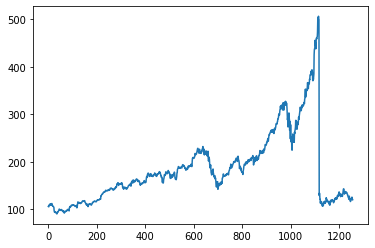

In [12]:
from matplotlib import pyplot as plt
plt.plot(df1)

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1

array([[0.03797956],
       [0.03687312],
       [0.03571858],
       ...,
       [0.08279014],
       [0.07261575],
       [0.0713169 ]])

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [19]:
train_size

817

In [24]:
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [25]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [28]:
X_test.shape,y_test.shape

((339, 100), (339,))

In [30]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 339 samples
Epoch 1/100
716/716 [==============================] - 9s 12ms/sample - loss: 0.0085 - val_loss: 0.0528
Epoch 2/100
716/716 [==============================] - 2s 3ms/sample - loss: 0.0026 - val_loss: 0.0251
Epoch 3/100
716/716 [==============================] - 2s 3ms/sample - loss: 0.0011 - val_loss: 0.0207
Epoch 4/100
716/716 [==============================] - 2s 3ms/sample - loss: 5.4610e-04 - val_loss: 0.0201
Epoch 5/100
716/716 [==============================] - 3s 4ms/sample - loss: 4.1082e-04 - val_loss: 0.0202
Epoch 6/100
716/716 [==============================] - 3s 4ms/sample - loss: 4.0529e-04 - val_loss: 0.0188
Epoch 7/100
716/716 [==============================] - 3s 4ms/sample - loss: 3.6188e-04 - val_loss: 0.0183
Epoch 8/100
716/716 [==============================] - 3s 4ms/sample - loss: 3.4626e-04 - val_loss: 0.0179
Epoch 9/100
716/716 [==============================] - 3s 4ms/sample - loss: 3.3460e-04 - val_loss: 0.0177
Ep

716/716 [==============================] - 3s 4ms/sample - loss: 1.3743e-04 - val_loss: 0.0090
Epoch 77/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.2080e-04 - val_loss: 0.0069
Epoch 78/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.2023e-04 - val_loss: 0.0077
Epoch 79/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.2125e-04 - val_loss: 0.0084
Epoch 80/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.4386e-04 - val_loss: 0.0073
Epoch 81/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.1784e-04 - val_loss: 0.0080
Epoch 82/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.1244e-04 - val_loss: 0.0084
Epoch 83/100
716/716 [==============================] - 4s 5ms/sample - loss: 1.1725e-04 - val_loss: 0.0069
Epoch 84/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.1583e-04 - val_loss: 0.0087
Epoch 85/100
716/716 [===================

In [36]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [37]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

168.34469079807178

In [40]:
math.sqrt(mean_squared_error(y_test,test_predict))

252.17414211939925

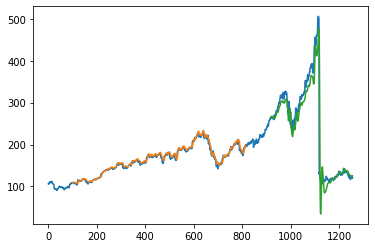

In [42]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [56]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [57]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.08472122]
101
1 day input [0.06316296 0.05017438 0.06008419 0.044546   0.04432952 0.04834636
 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425
 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975
 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592
 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613
 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.11720986
 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177
 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967
 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633
 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162
 0.09007817 0.08365604 0.07629585

12 day output [[0.09444728]]
13 day input [0.06944077 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975
 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592
 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613
 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.11720986
 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177
 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967
 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633
 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162
 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646 0.06258569
 0.07395069 0.07129284 0.07605532 0.0738184  0.08093806 0.08473842
 0.08279014 0.072615

24 day output [[0.10627353]]
25 day input [0.07788334 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613
 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.11720986
 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177
 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967
 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633
 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162
 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646 0.06258569
 0.07395069 0.07129284 0.07605532 0.0738184  0.08093806 0.08473842
 0.08279014 0.07261575 0.0713169  0.08472122 0.08448234 0.08469875
 0.08535507 0.08629538 0.08736746 0.08846952 0.0895496  0.09058994
 0.09159118 0.092561

In [58]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

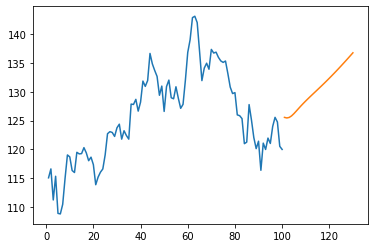

In [61]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))